## --- Comment Analyser ---

This project focuses on processing Amazon's fine food reviews by focusing on sentiment analysis using Python and its data analysing libraries like Numpy, Pandas and Matplotlib. Here, we will analyse the reviews in two different approach models: 

1. **VADER (Valence Aware Dictionary and sEntiment Reasoner) Model**
    - This model just extracts individual word and based on every word's meaning it results out whether the overall review might be positive or negative.
2. **Roberto Model from Hugging Face** 
    - This is a transformer model and more advanced model compared to Vader model as it 

In [1]:
%pip install numpy pandas matplotlib beautifulsoup4 transformers seaborn nltk scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing libraries for data analysis
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# importing seaborn to further optimize data visualization
import seaborn as sns
# Applying 'ggplot' style to all the future Matplotlib plots.
plt.style.use('ggplot')
# importing Natural Language Tool Kit 
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/abanishkhatry/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/abanishkhatry/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/abanishkhatry/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/abanishkhatry/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/abanishkhatry/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagg

True

In [3]:
# Reading the csv file from input dataset i.e. Amazon-Fine-Food-Reviews
df = pd.read_csv('./AmazonReviews/Reviews.csv') 
# Checking the size of the data set
df.shape
# Reducing the dataset size to 500 reviews to implement the models. 
# Doing this to make it easy to play around with the dataset. 
df = df.head(500)

Text(0.5, 0, 'Review Stars')

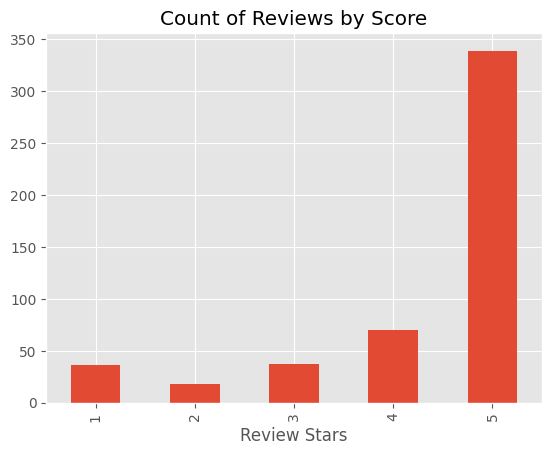

In [4]:

# Extracting the total number of each review score (i.e. betn 1-5) and plotting it. 
score_num = df['Score'].value_counts().sort_index().plot(
    kind='bar', 
    title='Count of Reviews by Score')
# Labelling X-Axis
score_num.set_xlabel('Review Stars')

## Exploring Natural Language ToolKit 

In [5]:
# Extracting a single review to explore different features of NLTK. 
example_text = df['Text'][50]
example_text

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [6]:
# This will split the whole sentence into a list containing each words
tokens = nltk.word_tokenize(example_text)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [7]:
# Associating each words into its equivalent part of speach and displaying it in list of tuple
tags_for_tokens = nltk.pos_tag(tokens)
tags_for_tokens

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [8]:
# linking each word and pos to its entity
entities = nltk.chunk.ne_chunk(tags_for_tokens)
# pretty printing it
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## MODEL 1 : VADER SENTIMENT ANALYSIS
- Here, we will be using NLTK's SentimentIntensityAnalyzer to get the positive, neutral and negative scores of the text. 
- This will use the 'bag of words' approach where Stop words are removed and Overall score is given by combining each word's score.
- Drawback of such approach is the it fails to understand the relationship between the words and also fails to recognize Sarcasm, Idioms and Negations. 

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Making SentimentIntensityAnalyzer object.
sia = SentimentIntensityAnalyzer()

In [10]:
# This will check the example_text's sentiment based on its positive, negative or neutral value (range 0-1)
# It also as a compound value which constitutes the aggregate of these three value and the range is -1 to 1
# If the compound value is closer to -1 its more negative and if closer to 1 then its more positive. 
sia.polarity_scores(example_text)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [11]:
# Creating a dictionary to store the polarity scores for respective id. 
res = {}
#Running the polarity score on entire dataset. 
for i, row in df.iterrows():
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [12]:
# Converting res into panda dataframe for simple data visualization
vaders_result = pd.DataFrame(res).T
#Renaming the column
vaders_result = vaders_result.reset_index().rename(columns ={'index': 'Id'})
#Merging with the orginal data set from the left side. 
vaders_result = vaders_result.merge(df, how = "left")
# Printing the first five elements of the new dataframe after inclusion
vaders_result.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plotting Vader Model's Result

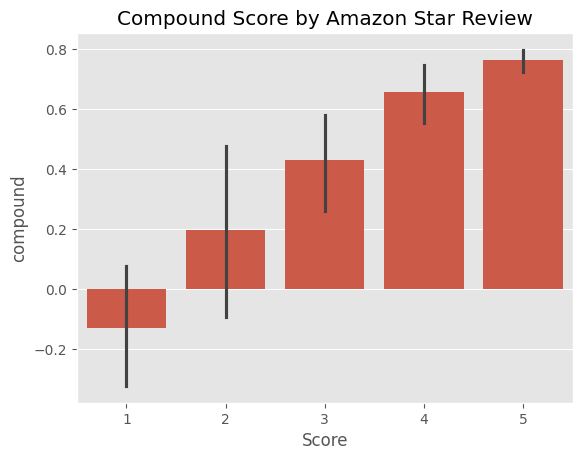

In [25]:
# Plotting the vaders result in a barplot format
plot_vaders = sns.barplot(data = vaders_result, x = "Score", y = "compound")
plot_vaders.set_title("Compound Score by Amazon Star Review")
plt.show()
## As expected, lower review star score has lower compound scores. 

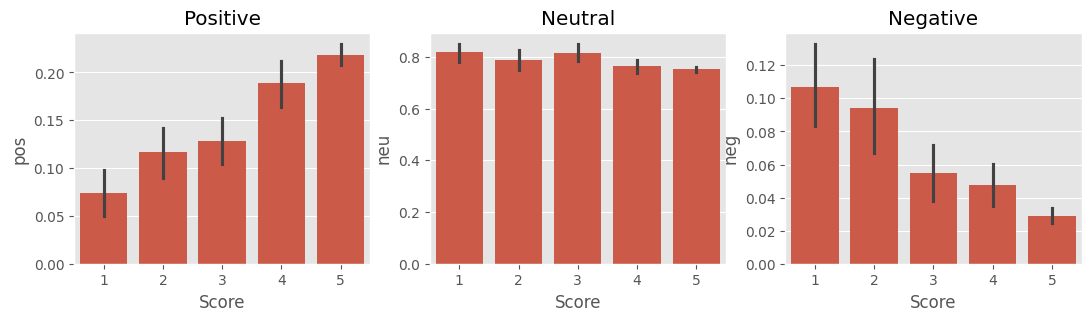

In [26]:
# Presenting a comparison between the Positive, Negative and Neutral Vader Result Score. 
fig, axs = plt.subplots(1,3, figsize=(13,3))
sns.barplot(data = vaders_result, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders_result, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders_result, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

## MODEL 2 : RoBERTa SENTIMENT ANALYSIS
- This is a transformer based deep learning model, that is better at picking up relationships between the words in the sentence and is more likely to predict a more definite sentiment analysis. 

In [15]:
# Loading different libraries provided by Hugging Face
from transformers import AutoTokenizer, AutoConfig
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

/Users/abanishkhatry/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/abanishkhatry/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# Using the pre-trained model to initialize the model for creating tokens and for sequence classification. 
tokenizer = AutoTokenizer.from_pretrained('./huggingFaceModel')
model = AutoModelForSequenceClassification.from_pretrained('./huggingFaceModel')

/Users/abanishkhatry/Library/Python/3.9/lib/python/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the model checkpoint at ./huggingFaceModel were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identic

In [17]:
# Function that returns a dictionary with roberta model's positive, negative and neutral result of the passed text. 
def polarity_scores_roberta(example_text): 
  encoded_text = tokenizer(example_text, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : round(float(scores[0]),3),
    'roberta_neu' : round(float(scores[1]),3),
    'roberta_pos' : round(float(scores[2]),3)
  }
  return scores_dict

In [18]:
# Creating a dictionary to store the polarity scores for respective id. 
res = {}
# Iterating over every rows to extract both Vader's and Roberta's polarity score. 
for i, row in df.iterrows():
    # Using try-catch to skip id's that come across RuntimeError. 
    try: 
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        # Renaming the keys of vader result to more definite ones. 
        for key, value in vader_result.items():
            vader_result_rename [f"vader_{key}"] = value 
        roberta_result = polarity_scores_roberta(text)
        # Combining the both of the model's result in a common dictionary
        combined_results = {**vader_result_rename, **roberta_result}
        # Relating IDs with their respective combined model's result dictionary
        res[myid] = combined_results
    except RuntimeError:
        print(f'broke for id {myid}') 



broke for id 83
broke for id 187


In [19]:
# Converting the final result into a data frame structure for easy data visualization
final_result_df = pd.DataFrame(res).T
#Renaming the column
final_result_df = final_result_df.reset_index().rename(columns ={'index': 'Id'})
#Merging with the orginal data set from the left side. 
final_result_df = final_result_df.merge(df, how = "left")
# Exploring how the dataset looks like (initial 5)
final_result_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.011,0.039,0.951,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.717,0.271,0.012,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005,0.078,0.917,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.003,0.047,0.950,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.005,0.009,0.986,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Comparing Scores Between Models

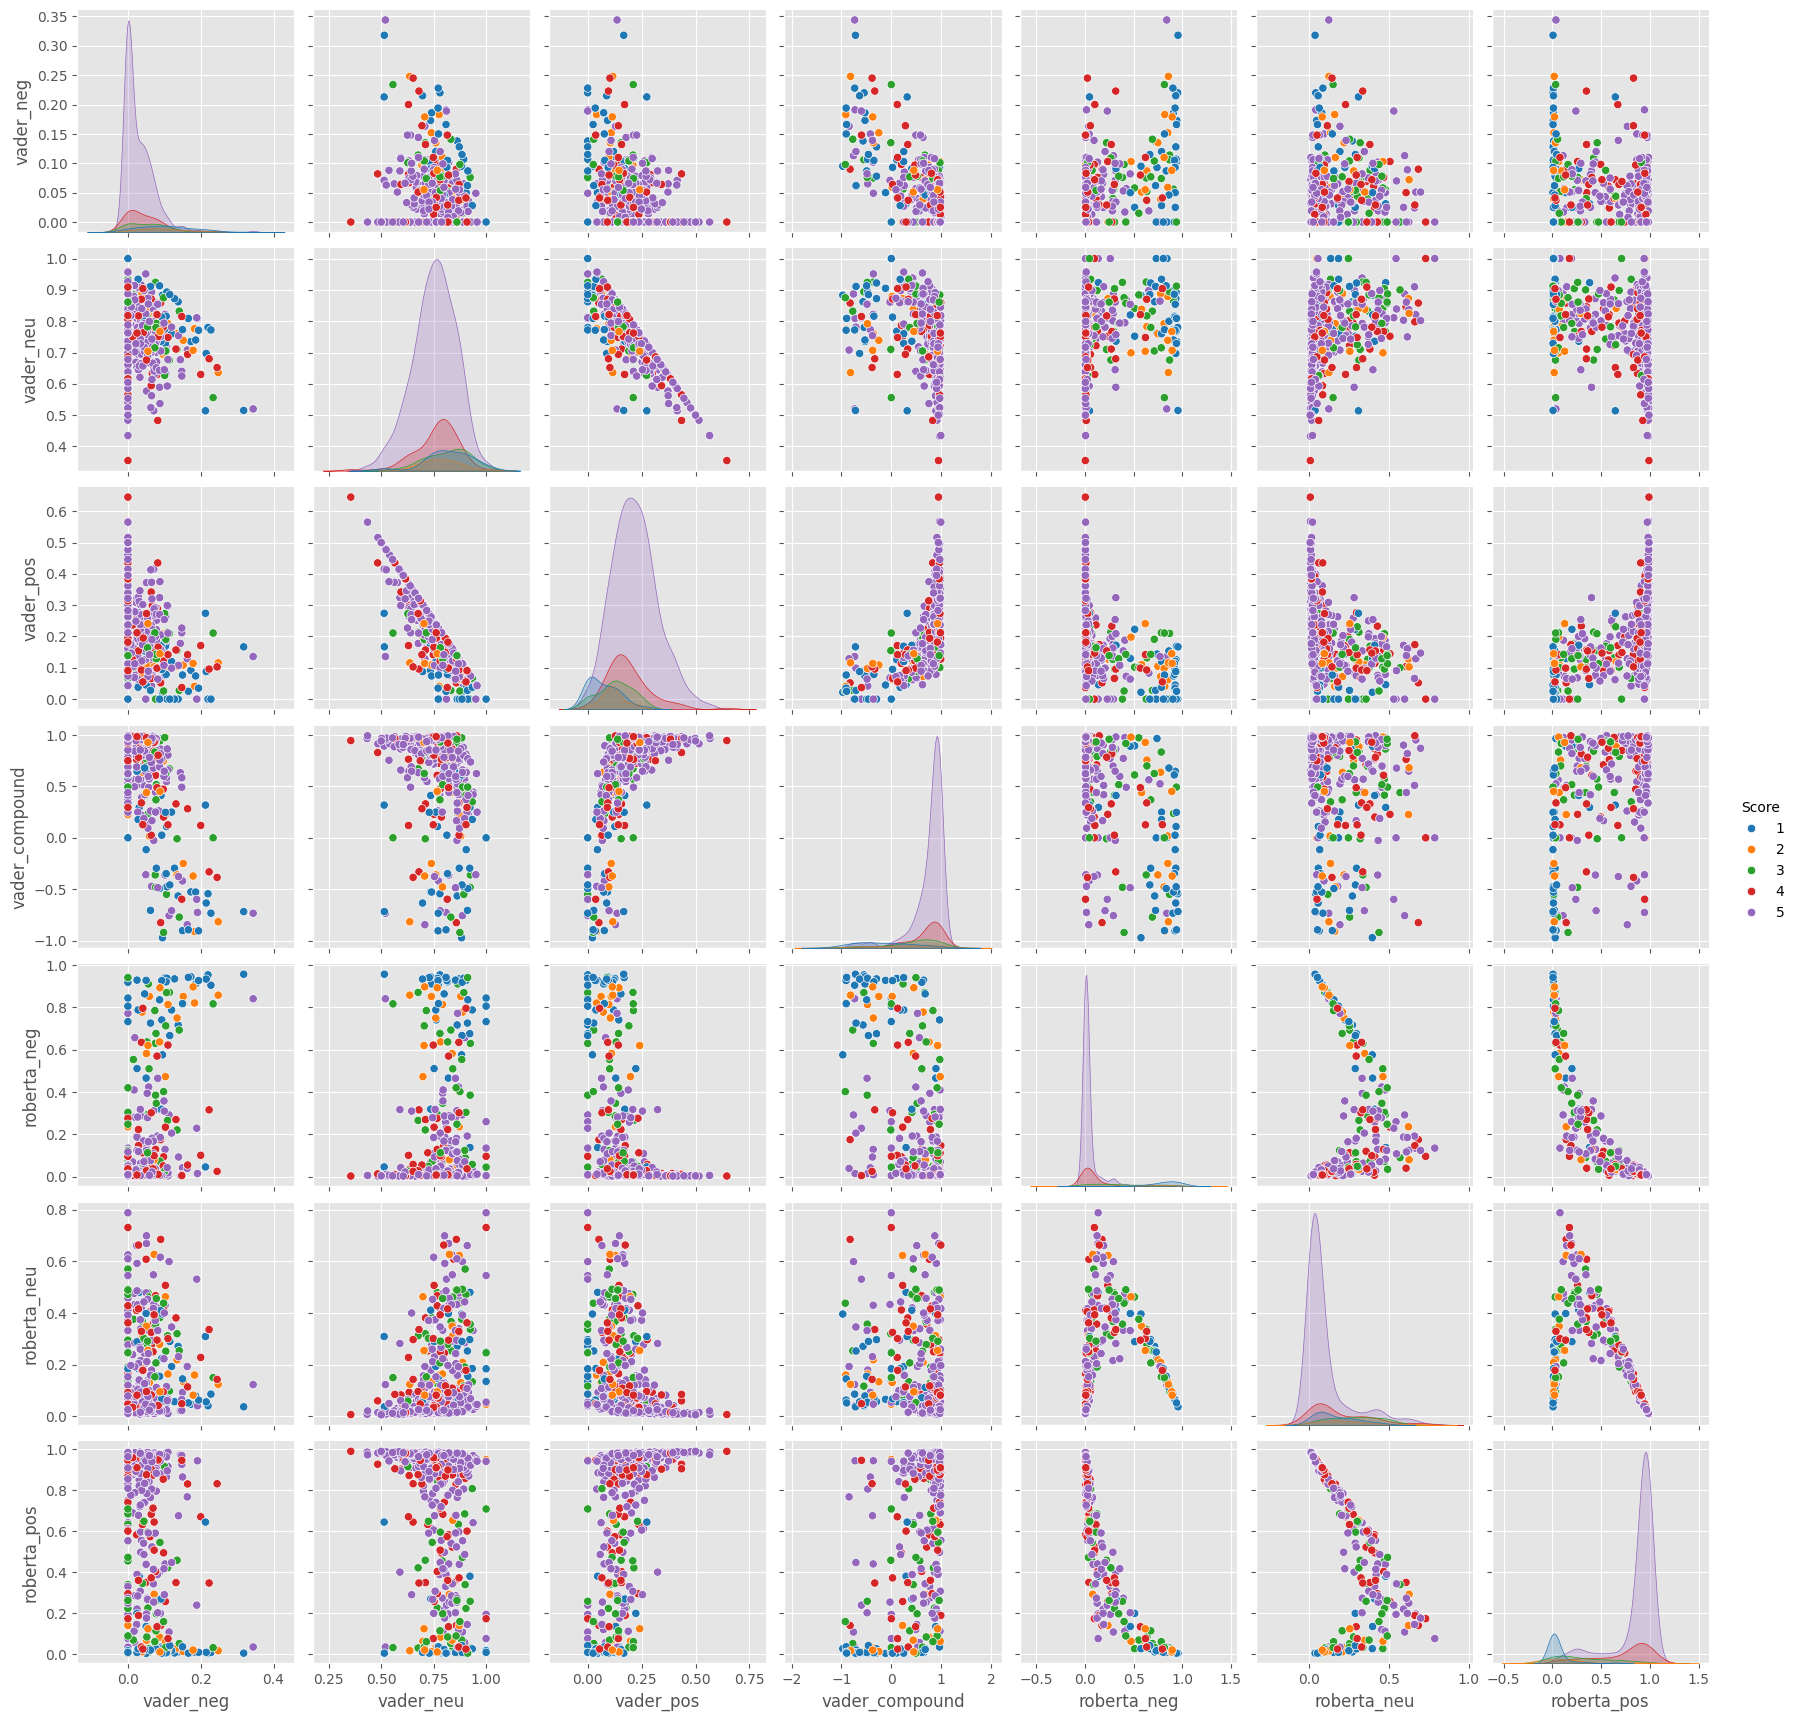

In [20]:
# Generating a pairplot for comparing the results of both Vader's Model and Roberta Model in a single frame. 
sns.pairplot(data = final_result_df, 
             vars = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], 
       hue = 'Score', 
       palette= 'tab10'
             )
plt.show()

## Reviewing Examples

- Looking at Positive 1-Star and Negative 5-Star reviews. 
- Exploring some examples where the model score and the review score differ the most, showcasing model's weakness to interpret sarcasm, negation and idioms. 

In [21]:
final_result_df.query('Score == 1')\
  .sort_values('roberta_pos', ascending= False )['Text'].values[0] 

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [22]:
final_result_df.query('Score == 1')\
  .sort_values('vader_pos', ascending= False )['Text'].values[0] 

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [23]:
final_result_df.query('Score == 5')\
  .sort_values('roberta_neg', ascending= False )['Text'].values[0] 

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [24]:
final_result_df.query('Score == 5')\
  .sort_values('vader_neg', ascending= False )['Text'].values[0] 

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'